Step 1 : Basic Setup and Imports


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


c:\Users\MUTHU SELVAM\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\MUTHU SELVAM\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\MUTHU SELVAM\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at te

Step 2 : Set Local Dataset Path

In [2]:
# Set your dataset folder exactly as it is saved on your computer
dataset_path = r'D:\learning\GUVI PROJECTS\project - 5\dataset'
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir  = os.path.join(dataset_path, 'test')


Step 3 : Preview Class Names and Sample Images

Tumor classes found: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


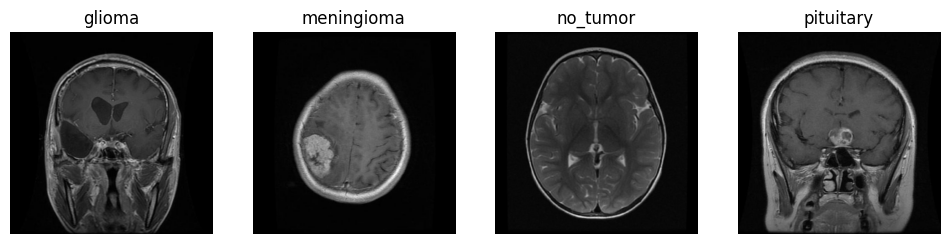

In [3]:
# Discover class folders (tumor types) under train
class_names = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print("Tumor classes found:", class_names)

# Preview one image per class
plt.figure(figsize=(12,6))
for i, class_name in enumerate(class_names):
    class_folder = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if image_files:
        img = plt.imread(os.path.join(class_folder, image_files[0]))
        plt.subplot(1, len(class_names), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')
plt.show()


Step 4 : Data Generators with Augmentation

In [4]:
image_size = (224, 224)
batch_size = 32

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)
datagen_valid = ImageDataGenerator(rescale=1./255)
datagen_test  = ImageDataGenerator(rescale=1./255)

train_gen = datagen_train.flow_from_directory(
    train_dir, target_size=image_size, batch_size=batch_size,
    class_mode='categorical', shuffle=True
)
valid_gen = datagen_valid.flow_from_directory(
    valid_dir, target_size=image_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)
test_gen = datagen_test.flow_from_directory(
    test_dir, target_size=image_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)



Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


Step 5 : Model 1 – Custom CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

custom_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])
custom_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
custom_model.summary()


c:\Users\MUTHU SELVAM\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,372 (42.61 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

Training:

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_ckpt = ModelCheckpoint('best_custom_cnn.h5', save_best_only=True, monitor='val_loss', mode='min')

history_cnn = custom_model.fit(
    train_gen,
    epochs=20,
    validation_data=valid_gen,
    callbacks=[early_stop_cnn, cnn_ckpt]
)


c:\Users\MUTHU SELVAM\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4870 - loss: 19.1049

53/53 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5097 - loss: 9.7697 - val_accuracy: 0.2410 - val_loss: 39.7334
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4838 - loss: 1.4542 - val_accuracy: 0.2351 - val_loss: 47.2295
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4233 - loss: 1.2644

53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4448 - loss: 1.2944 - val_accuracy: 0.2829 - val_loss: 37.2696
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4445 - loss: 1.4452

53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4820 - loss: 1.3066 - val_accuracy: 0.3028 - val_loss: 28.0047
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4875 - loss: 1.1903

53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4956 - loss: 1.1977 - val_accuracy: 0.2092 - val_loss: 26.3360
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5214 - loss: 1.1634

53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5121 - loss: 1.1247 - val_accuracy: 0.1912 - val_loss: 10.1148
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4867 - loss: 1.1055 - val_accuracy: 0.2211 - val_loss: 11.2148
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5026 - loss: 1.1414

53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5032 - loss: 1.1374 - val_accuracy: 0.5458 - val_loss: 1.3895
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5360 - loss: 1.2935

53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5233 - loss: 1.1690 - val_accuracy: 0.5757 - val_loss: 1.0072
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5386 - loss: 1.0912 - val_accuracy: 0.5279 - val_loss: 1.3728
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5333 - loss: 1.1032 - val_accuracy: 0.5558 - val_loss: 1.4067
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5280 - loss: 1.0793

53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5357 - loss: 1.0620 - val_accuracy: 0.6355 - val_loss: 0.8578
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5711 - loss: 1.0769 - val_accuracy: 0.3705 - val_loss: 100.2869
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5345 - loss: 1.0240 - val_accuracy: 0.6315 - val_loss: 0.9010
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5586 - loss: 1.0015

53/53 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.5499 - loss: 1.0172 - val_accuracy: 0.6235 - val_loss: 0.8193
Epoch 16/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.5699 - loss: 0.9706 - val_accuracy: 0.5359 - val_loss: 3.2621
Epoch 17/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5670 - loss: 0.9976 - val_accuracy: 0.6235 - val_loss: 1.1963
Epoch 18/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5428 - loss: 1.0164 - val_accuracy: 0.6315 - val_loss: 0.9822
Epoch 19/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.5160 - loss: 1.0333

53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5345 - loss: 1.0071 - val_accuracy: 0.6614 - val_loss: 0.7701
Epoch 20/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5605 - loss: 0.9860 - val_accuracy: 0.4382 - val_loss: 5.9841


Evaluation:

In [8]:
loss_cnn, acc_cnn = custom_model.evaluate(test_gen)
print(f"Custom CNN Test Acc: {acc_cnn:.4f} | Loss: {loss_cnn:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.6626 - loss: 0.6417
Custom CNN Test Acc: 0.6626 | Loss: 0.6417


Step 6 :  Model 2 – Transfer Learning (MobileNetV2)

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

tl_model = Model(base_model.input, output)
tl_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Training:

In [10]:
early_stop_tl = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tl_ckpt = ModelCheckpoint('best_tl_model.h5', save_best_only=True, monitor='val_loss', mode='min')

history_tl = tl_model.fit(
    train_gen,
    epochs=20,
    validation_data=valid_gen,
    callbacks=[early_stop_tl, tl_ckpt]
)


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.5521 - loss: 1.1591

53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 816ms/step - accuracy: 0.6814 - loss: 0.8329 - val_accuracy: 0.7988 - val_loss: 0.5054
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.8244 - loss: 0.4601

53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.8301 - loss: 0.4473 - val_accuracy: 0.7829 - val_loss: 0.5048
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8662 - loss: 0.3674

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 509ms/step - accuracy: 0.8614 - loss: 0.3822 - val_accuracy: 0.8386 - val_loss: 0.4178
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8681 - loss: 0.3366

53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 522ms/step - accuracy: 0.8779 - loss: 0.3162 - val_accuracy: 0.8546 - val_loss: 0.4069
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 506ms/step - accuracy: 0.8708 - loss: 0.3336 - val_accuracy: 0.8466 - val_loss: 0.4321
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.9008 - loss: 0.2690

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.8979 - loss: 0.2671 - val_accuracy: 0.8645 - val_loss: 0.4069
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - accuracy: 0.8968 - loss: 0.2859 - val_accuracy: 0.8088 - val_loss: 0.5338
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.8989 - loss: 0.2544

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 512ms/step - accuracy: 0.9050 - loss: 0.2525 - val_accuracy: 0.8586 - val_loss: 0.4054
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9163 - loss: 0.2381

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 516ms/step - accuracy: 0.9168 - loss: 0.2357 - val_accuracy: 0.8645 - val_loss: 0.3676
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 513ms/step - accuracy: 0.9274 - loss: 0.2100 - val_accuracy: 0.8566 - val_loss: 0.4258
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9258 - loss: 0.1894

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 513ms/step - accuracy: 0.9274 - loss: 0.1971 - val_accuracy: 0.8805 - val_loss: 0.3394
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 504ms/step - accuracy: 0.9369 - loss: 0.1908 - val_accuracy: 0.8645 - val_loss: 0.4294
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - accuracy: 0.9304 - loss: 0.1859 - val_accuracy: 0.8705 - val_loss: 0.3826
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 506ms/step - accuracy: 0.9416 - loss: 0.1620 - val_accuracy: 0.8725 - val_loss: 0.3958
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.9357 - loss: 0.1791 - val_accuracy: 0.8705 - val_loss: 0.3751
Epoch 16/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9410 - loss: 0.1642

53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 523ms/step - accuracy: 0.9445 - loss: 0.1654 - val_accuracy: 0.8845 - val_loss: 0.3028
Epoch 17/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - accuracy: 0.9410 - loss: 0.1613 - val_accuracy: 0.8845 - val_loss: 0.3317
Epoch 18/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.9481 - loss: 0.1532 - val_accuracy: 0.8327 - val_loss: 0.5335
Epoch 19/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 509ms/step - accuracy: 0.9499 - loss: 0.1584 - val_accuracy: 0.8645 - val_loss: 0.4175
Epoch 20/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.9493 - loss: 0.1400 - val_accuracy: 0.8645 - val_loss: 0.3848


Evaluation:

In [11]:
loss_tl, acc_tl = tl_model.evaluate(test_gen)
print(f"MobileNetV2 Test Acc: {acc_tl:.4f} | Loss: {loss_tl:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.8699 - loss: 0.3479
MobileNetV2 Test Acc: 0.8699 | Loss: 0.3479


Step 7 : Model Comparison

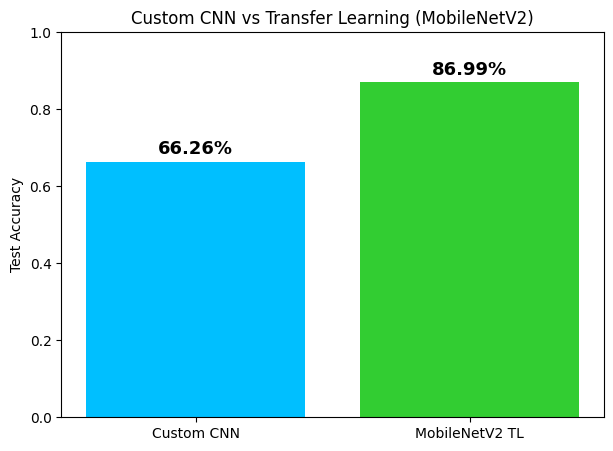

In [12]:
import matplotlib.pyplot as plt

models = ['Custom CNN', 'MobileNetV2 TL']
accuracies = [acc_cnn, acc_tl]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies, color=['deepskyblue', 'limegreen'])
plt.ylim([0, 1])
plt.ylabel("Test Accuracy")
plt.title("Custom CNN vs Transfer Learning (MobileNetV2)")
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01, f"{acc:.2%}",
             ha='center', va='bottom', fontweight='bold', fontsize=13)
plt.show()
